<a href="https://colab.research.google.com/github/lageniaestela/12demayo/blob/master/lena2bordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pandas numpy matplotlib seaborn


Dimensiones imagen original: (225, 400, 3)
Dimensiones imagen en gris: (225, 400)


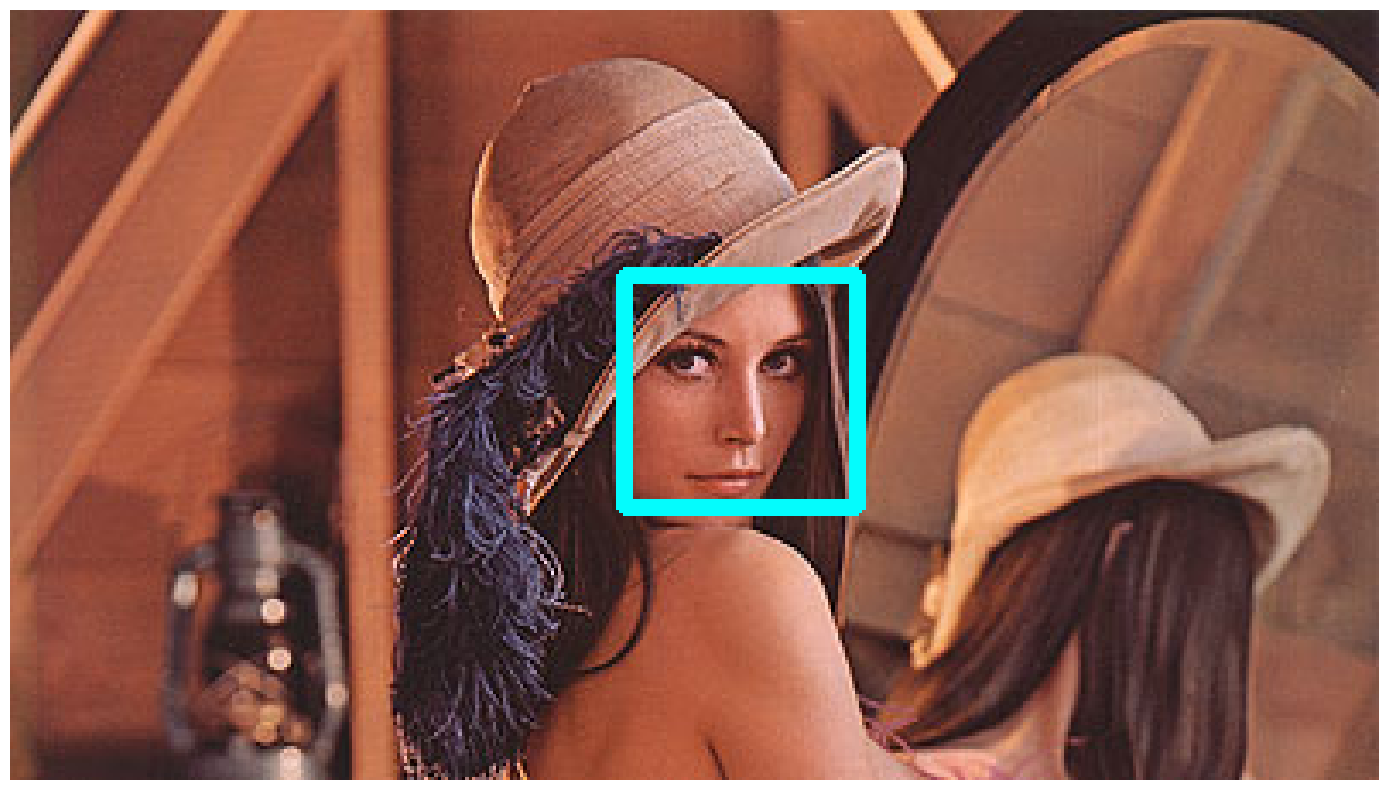

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

imagePath = "/content/lena.jpg"
img = cv2.imread(imagePath)

# Verifica si la imagen se cargó bien
if img is None:
    raise FileNotFoundError(f"No se encontró la imagen en: {imagePath}")

# Mostrar dimensiones de la imagen (opcional)
print("Dimensiones imagen original:", img.shape)

# Convertir a escala de grises
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Dimensiones imagen en gris:", gray_image.shape)

# Cargar el clasificador de rostros
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(gray_image, 1.3, 5)

# Dibujar rectángulos sobre las caras detectadas
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (253, 252, 4), 4)

# Convertir imagen a RGB para mostrar con matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen con matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

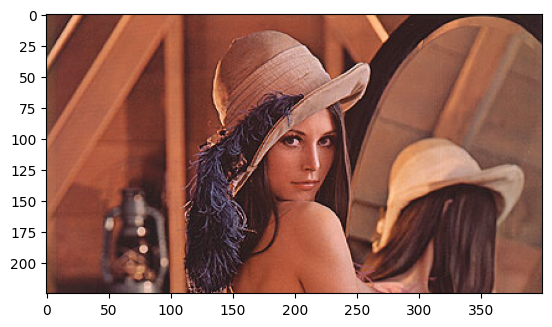

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFilter

import warnings
warnings.filterwarnings('ignore')
I = Image.open("/content/lena.jpg")
I.show()
plt.imshow(np.asarray(I))
plt.show()



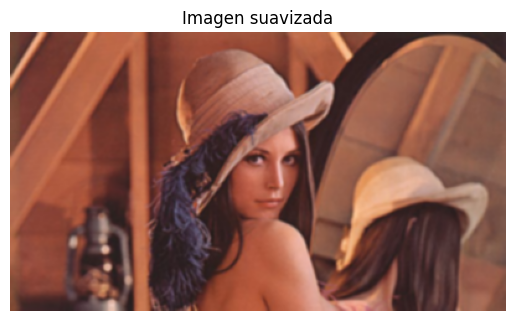

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFilter
import cv2
import warnings
warnings.filterwarnings('ignore')

# Cargar imagen con PIL
img_pil = Image.open("/content/lena.jpg")
img_pil.show()

# Convertir a array para usar con OpenCV
img_np = np.array(img_pil)

# OpenCV usa BGR, pero si la imagen es RGB puede funcionar igual para GaussianBlur
# Si fuera necesario convertir, descomentar esta línea:
# img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

# Aplicar suavizado Gaussiano
suavizada = cv2.GaussianBlur(img_np, (5, 5), 1)

# Mostrar resultado con Matplotlib (convertir BGR a RGB si fue convertido antes)
plt.imshow(suavizada)
plt.axis('off')
plt.title("Imagen suavizada")
plt.show()


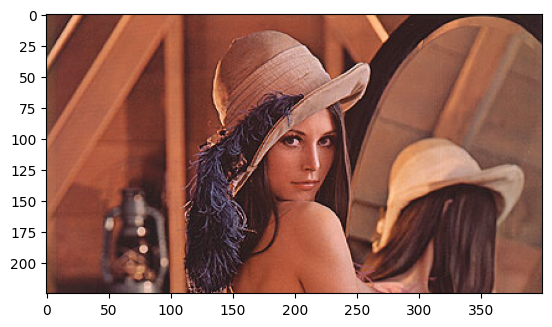

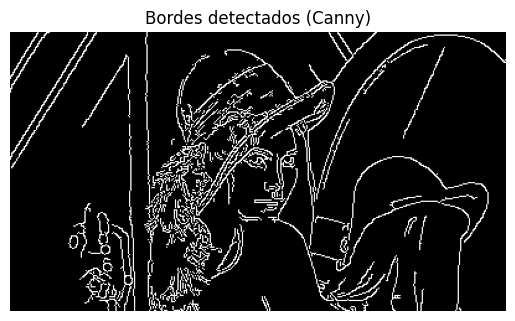

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import warnings

warnings.filterwarnings('ignore')

# Cargar imagen con PIL
img_pil = Image.open("/content/lena.jpg")

# Convertir a array de NumPy
img_matriciada = np.array(img_pil)

# Convertir a escala de grises
img_congrises = cv2.cvtColor(img_matriciada, cv2.COLOR_RGB2GRAY)

# Detectar bordes con Canny
bordes = cv2.Canny(img_congrises, threshold1=100, threshold2=200)

# Mostrar imagen de bordes
plt.imshow(img_pil)
plt.show()
plt.imshow(bordes, cmap='gray')
plt.axis('off')
plt.title("Bordes detectados (Canny)")
plt.show()


In [14]:
pip install opencv-contrib-python

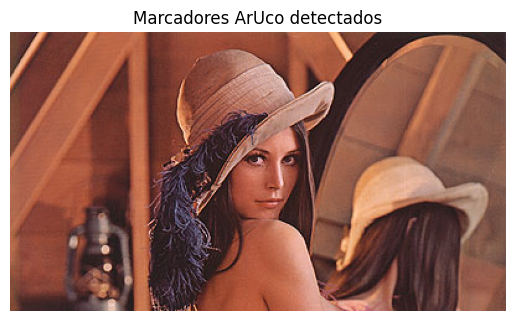

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar la imagen
img_pil = Image.open("/content/lena.jpg")
img_np = np.array(img_pil)

# Convertir a escala de grises (requerido por ArUco)
gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# Cargar diccionario de marcadores ArUco
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Detector de marcadores
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

# Detectar marcadores
corners, ids, rejected = detector.detectMarkers(gray)

# Dibujar los marcadores detectados
img_detected = img_np.copy()
if ids is not None:
    cv2.aruco.drawDetectedMarkers(img_detected, corners, ids)

# Mostrar el resultado
plt.imshow(img_detected)
plt.axis('off')
plt.title("Marcadores ArUco detectados")
plt.show()
